In [29]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file = 'C:/users/borna/documents/analize2.csv'

df = pd.read_csv(file).iloc[:, 1:]
#df = df.drop(df[df['result']=='Pending'].index)
df = df[df['result'].isin(['Win', 'Lose'])]

#Risk tolerance of the user
#Using clustering on the same events and comparing individuals win percentages to make the bet
#Frequency Distribution
#Frequency Dist over coefficients

In [30]:
#Calculating win percentages
win_counts = df[df['result']=='Win'].groupby('username').size()
total_counts = df.groupby('username').size()
win_percent = (win_counts/total_counts)*100

unique_usernames = df['username'].unique()
#.index & .values assures they are matching values
usernamePercent = {'username': total_counts.index, 'Win Percentages': win_percent.values, 'Total Bets': total_counts.values}
df_1 = pd.DataFrame(usernamePercent)
df_1.reset_index(drop=True, inplace=True)
df_1 = df_1.dropna(subset=['Win Percentages'])
df_1 = df_1[df_1['Total Bets'] >= 20]

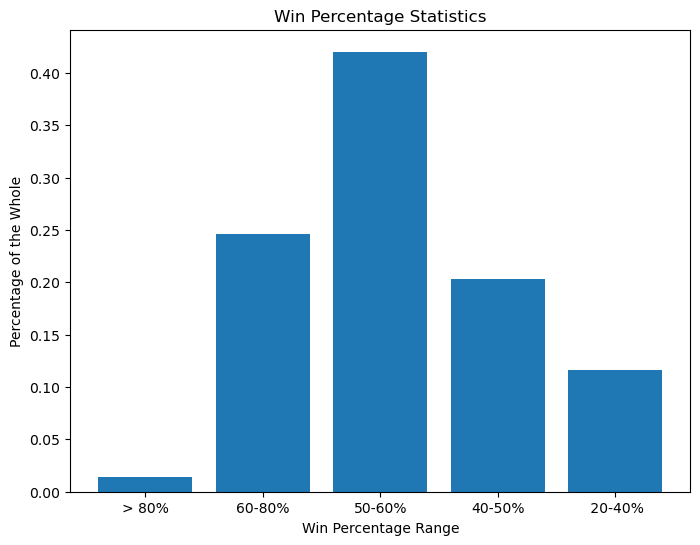

In [31]:
#Plotting win percentages using determined labels to users with >= 20 total bets
percentOfDataset = [
    (df_1['Win Percentages'] > 80).sum()/69,
    ((df_1['Win Percentages'] > 60) & (df_1['Win Percentages'] <= 80)).sum()/69,
    ((df_1['Win Percentages'] >= 50) & (df_1['Win Percentages'] <= 60)).sum()/69,
    ((df_1['Win Percentages'] > 40) & (df_1['Win Percentages'] < 50)).sum()/69,
    ((df_1['Win Percentages'] >= 20) & (df_1['Win Percentages'] <= 40)).sum()/69
]

labels = ['> 80%', '60-80%', '50-60%', '40-50%', ' 20-40%']


plt.figure(figsize=(8,6))
plt.bar(labels, percentOfDataset)
plt.title('Win Percentage Statistics')
plt.xlabel('Win Percentage Range')
plt.ylabel('Percentage of the Whole')
plt.show()

In [46]:
#Sorting users upon biggest win_percentages

bestToWorst = df_1.sort_values(by='Win Percentages', ascending=False).head(10)
worstToBest = df_1.sort_values(by='Win Percentages').head(20)
bestToWorst, worstToBest

(        username  Win Percentages  Total Bets
 1099     nidoo48        86.363636          22
 112     Crorasta        77.941176          68
 974    kontorola        70.588235          68
 834     drobi123        68.965517          29
 287      Juki098        67.857143          28
 251       Igor40        66.666667          21
 1025  majmun1950        66.037736          53
 1061   mateo1130        65.217391          69
 36         Apm21        65.217391          23
 959        kibe2        65.217391          23,
          username  Win Percentages  Total Bets
 556   Sanjooo1908        21.739130          23
 853       ficcoo8        35.483871          31
 412   Marko_Sapit        37.500000          24
 988       lazaneo        37.500000          24
 335     LaMartina        38.000000          50
 946     karlo1512        38.095238         105
 1089      mrki69m        39.130435          23
 75    Bosancic542        40.000000          30
 760      bruc0502        41.176471          51
 6

In [33]:
df[df['username'] == 'Crorasta']

,_id,odds,event,result,date,type,sport,username
45,65aebbd1eb4fb347675ad363,1.25,Wigan-Manchester Utd,Win,08.01.,2,Football,Crorasta
71,65aebbd1eb4fb347675ad37d,1.35,Union Berlin-Real Madrid,Win,12.12.,X2,Football,Crorasta
159,65aebbd1eb4fb347675ad3d5,1.20,Cibona-Partizan Beog.,Win,15.01.,2,Basketball,Crorasta
174,65aebbd1eb4fb347675ad3e4,1.03,Danska-Češka,Win,11.01.,1,Handball,Crorasta
306,65aebbd1eb4fb347675ad468,1.65,Everton-Manchester City,Win,27.12.,2,Football,Crorasta
...,...,...,...,...,...,...,...,...
5540,65dafaf8d7a3c668d153f667,1.75,DinamoZ/odg-HNK Rijeka,Lose,25.02.,da,Football,Crorasta
5613,65dafaf8d7a3c668d153f6b0,1.20,NK Varaždin-Hajduk Split,Win,24.02.,X2,Football,Crorasta
5723,65dafaf9d7a3c668d153f71e,1.75,LokomoZG/odg-NK Osijek,Win,23.02.,da,Football,Crorasta
5827,65dafaf9d7a3c668d153f786,1.30,Liverpool(sš)-Luton Town,Win,21.02.,1,Football,Crorasta


c:\Users\borna\anaconda3\envs\6.8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\borna\anaconda3\envs\6.8\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\borna\anaconda3\envs\6.8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\borna\anaconda3\envs\6.8\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

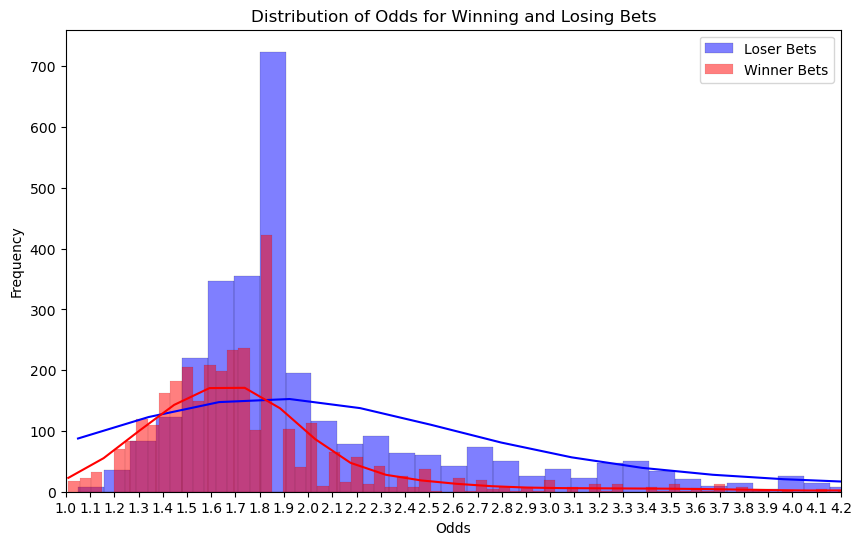

In [49]:
#Clustering by odds to create density plots for wins and loses 
loserOdds = df[df['result'] == 'Lose']['odds']
winnerOdds = df[df['result'] == 'Win']['odds']

plt.figure(figsize=(10,6))

sns.histplot(loserOdds, color='blue', kde=True, label='Loser Bets')
sns.histplot(winnerOdds, color='red', kde=True, label='Winner Bets')

plt.xlim(1, 4)
plt.xticks(np.arange(1, 4.25, step=0.1))

plt.xlabel('Odds')
plt.ylabel('Frequency')
plt.title('Distribution of Odds for Winning and Losing Bets')
plt.legend()
plt.show()

In [51]:
#Similarities Between Bets of Good and Bad Bettors
best_bettors = bestToWorst['username']
worst_bettors = worstToBest['username']

best_bettors_data = df[df['username'].isin(best_bettors)]
worst_bettors_data = df[df['username'].isin(worst_bettors)]

best_bettors_df = best_bettors_data[['username', 'event', 'odds', 'result']]
worst_bettors_df = best_bettors_data[['username', 'event', 'odds', 'result']]

,username,event,odds,result
45,Crorasta,Wigan-Manchester Utd,1.25,Win
71,Crorasta,Union Berlin-Real Madrid,1.35,Win
122,nidoo48,"Nor/Por(1.pe14,5)-Norveš",1.75,Win
129,kontorola,"NewcasUtd(zžk4,5)-AC Milan",1.45,Win
159,Crorasta,Cibona-Partizan Beog.,1.20,Win
...,...,...,...,...
6555,mateo1130,AnadEfes-Bayern München,1.40,Win
6652,majmun1950,HNK Gorica-Hajduk Split,1.55,Win
6710,nidoo48,"Gidsel M.(-6,5+)-Mag-FBe",1.75,Win
6740,kontorola,DinamoZ(sš)-Slaven Belupo,1.25,Win
